In [1]:
import numpy as np
import ROOT
from math import exp as expo
from math import cos as cosine
exp=np.vectorize(expo)
cos=np.vectorize(cosine)
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
import scipy.optimize as opt


Welcome to JupyROOT 6.24/06


In [2]:
rand_dataset=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

In [3]:
rand_R=[ -45.165933, -44.913515, -43.541246, -45.142251, -40.574325, -38.867101,-36.698514, -36.834831, -35.177533, -34.258278, -34.784201, -32.729071, -36.606397, -36.606398, -36.327551, -37.264421, -35.242243, -34.264745, -32.473897]

In [4]:
rand_dR=[0.90127663, 0.83639638, 1.5665898, 1.6378051, 3.6031168, 2.9298690,1.3821584, 2.4196299, 0.86775682, 1.3708257, 2.0455284, 1.2868438, 1.0142987, 1.0142980, 1.9470219, 2.3366940, 1.2529279, 0.90695426, 1.0606679]

In [5]:
copy_dataset=[1.1,2.1,3.1,4.1,5.1,6.1,7.1,8.1,9.1,10.1,11.1,12.1,13.1,14.1,15.1,16.1,17.1,18.1,19.1]

In [6]:
copy_R=[-45.44386135, -44.69157213, -43.8428146 , -44.26632555, -43.87476929, -38.91887194,-36.80044628, -34.90278362, -35.79899593, -34.56143981, -35.35780074, -33.17655805, -36.28951876, -36.04653166, -34.76312191, -35.26690691, -35.25064362, -34.60066678, -32.69903561]

In [7]:
copy_dR=[0.82243335, 0.89070745, 1.4532399 , 1.30112904, 2.75651353, 2.31839379, 1.12819475, 1.96305299, 0.78676956, 1.21705084, 1.69471997, 1.10801203, 1.15692326, 1.30868742, 1.74104879, 2.01821405, 1.06637582, 0.84804461, 0.93948371]

In [8]:
regularQ_dataset=[1.2,2.2,3.2,4.2,5.2,6.2,7.2,8.2,9.2,10.2,11.2,12.2,13.2,14.2,15.2,16.2,17.2,18.2,19.2]

In [9]:
regularQ_R=[-45.2334,-44.7186,-44.0918,-44.3028,-43.1591,-38.6466,-36.9532,-35.6876,-35.9127,-34.6729,-35.5002,-33.1129,-36.3899,-36.2701,-34.8781,-35.8336,-35.3045,-34.6595,-32.887]

In [10]:
regularQ_dR=[0.730804,0.792544,1.29892,1.11343,2.48789,2.08414,1.00197,1.77028,0.691679,1.05617,1.50085,0.972016,0.988472,1.19843,1.45883,1.77457,0.896068,0.708386,0.786607]

In [11]:
dataset=['2C','2D','2E','2F','2G','2H']

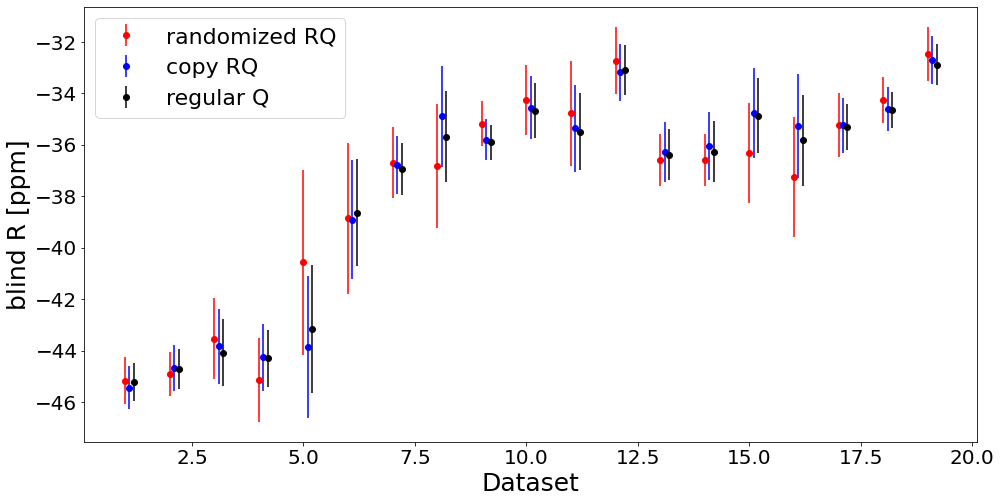

In [12]:
plt.figure(figsize=(16,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(rand_dataset, rand_R, yerr=rand_dR, fmt="o",color="red",label="randomized RQ")
plt.errorbar(copy_dataset, copy_R, yerr=copy_dR, fmt="o",color="blue",label="copy RQ")
plt.errorbar(regularQ_dataset, regularQ_R, yerr=regularQ_dR, fmt="o",color="black",label="regular Q")
#plt.errorbar(dataset,[0,0,0,0,0,0], yerr=0, fmt="o",color="white")
plt.xlabel('Dataset',fontsize=25)
plt.ylabel('blind R [ppm]',fontsize=25)
#plt.ylim([-48,-35])
#plt.xlim([100000,150000])
plt.legend(loc=2, prop={'size': 22})
plt.show()

In [13]:
R_rand_diff=np.empty(len(rand_dataset))
dR_rand_diff=np.empty(len(rand_dataset))
for i in range(0,len(rand_dataset)):
    R_rand_diff[i]=rand_R[i]-regularQ_R[i]
    dR_rand_diff[i]=np.sqrt( (rand_dR[i]*rand_dR[i]) + (regularQ_dR[i]*regularQ_dR[i]) )

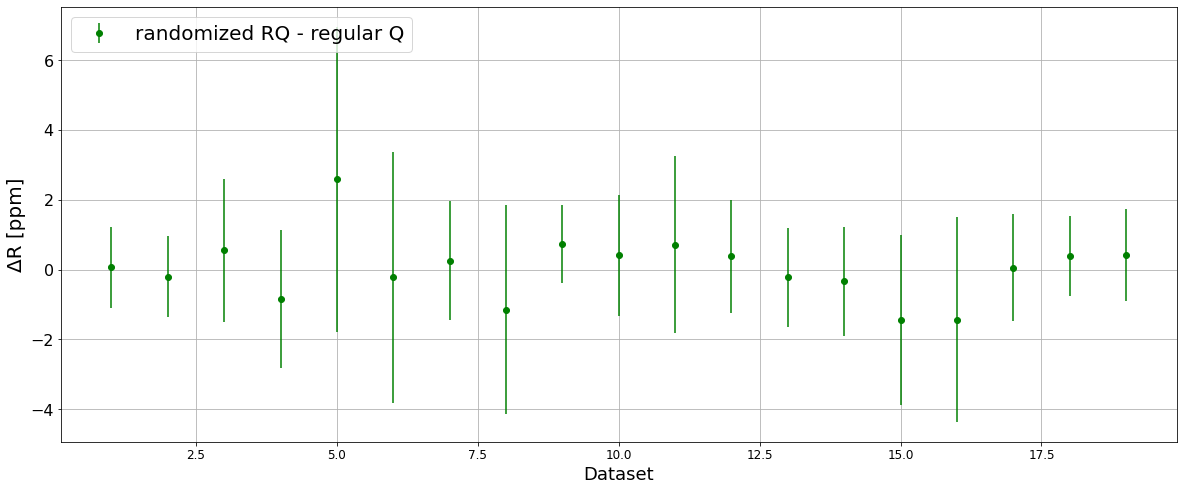

In [14]:
plt.figure(figsize=(20,8))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(rand_dataset, R_rand_diff, yerr=dR_rand_diff, fmt="o",color="green",label="randomized RQ - regular Q")
plt.xlabel('Dataset',fontsize=18)
plt.ylabel('ΔR [ppm]',fontsize=20)
#plt.ylim([-48,-35])
#plt.xlim([100000,150000])
plt.legend(loc=2, prop={'size': 20})
plt.grid()
plt.show()

In [15]:
R_copy_diff=np.empty(len(copy_dataset))
dR_copy_diff=np.empty(len(copy_dataset))
for i in range(0,len(copy_dataset)):
    R_copy_diff[i]=copy_R[i]-regularQ_R[i]
    dR_copy_diff[i]=np.sqrt( (copy_dR[i]*copy_dR[i]) + (regularQ_dR[i]*regularQ_dR[i]) )

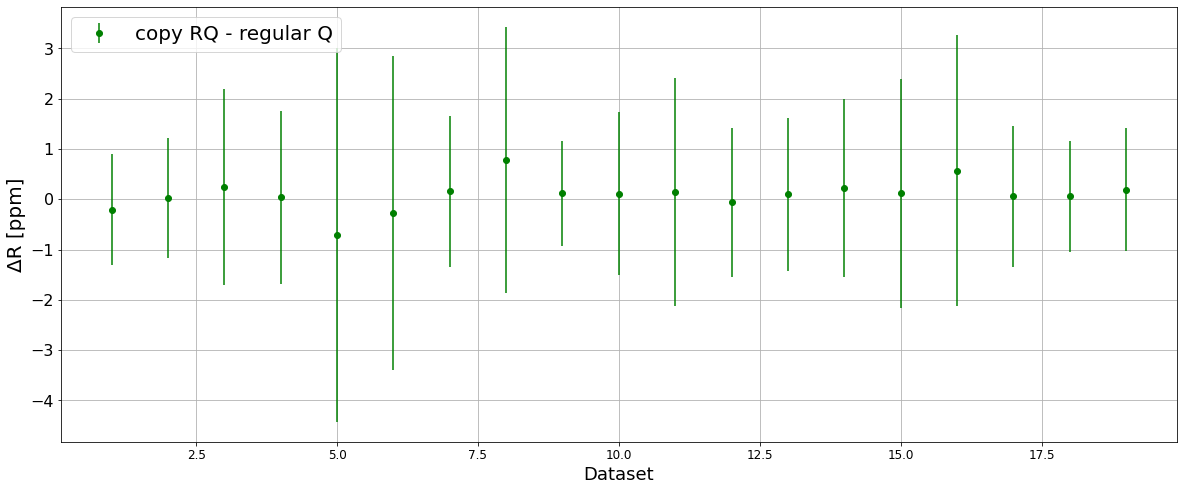

In [16]:
plt.figure(figsize=(20,8))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(rand_dataset, R_copy_diff, yerr=dR_copy_diff, fmt="o",color="green",label="copy RQ - regular Q")
plt.xlabel('Dataset',fontsize=18)
plt.ylabel('ΔR [ppm]',fontsize=20)
#plt.ylim([-48,-35])
#plt.xlim([100000,150000])
plt.legend(loc=2, prop={'size': 20})
plt.grid()
plt.show()

In [18]:
R_copy_rand_diff=np.empty(len(copy_dataset))
dR_copy_rand_diff=np.empty(len(copy_dataset))
for i in range(0,len(copy_dataset)):
    R_copy_rand_diff[i]=copy_R[i]-rand_R[i]
    dR_copy_rand_diff[i]=np.sqrt( (copy_dR[i]*copy_dR[i]) + (rand_dR[i]*rand_dR[i]) )

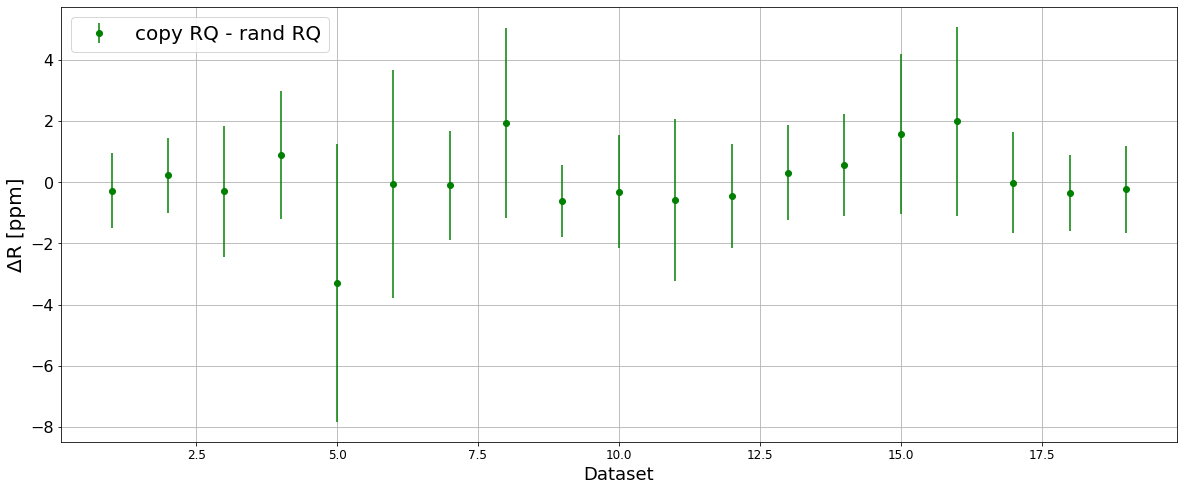

In [19]:
plt.figure(figsize=(20,8))
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=16) 
plt.errorbar(rand_dataset, R_copy_rand_diff, yerr=dR_copy_rand_diff, fmt="o",color="green",label="copy RQ - rand RQ")
plt.xlabel('Dataset',fontsize=18)
plt.ylabel('ΔR [ppm]',fontsize=20)
#plt.ylim([-48,-35])
#plt.xlim([100000,150000])
plt.legend(loc=2, prop={'size': 20})
plt.grid()
plt.show()

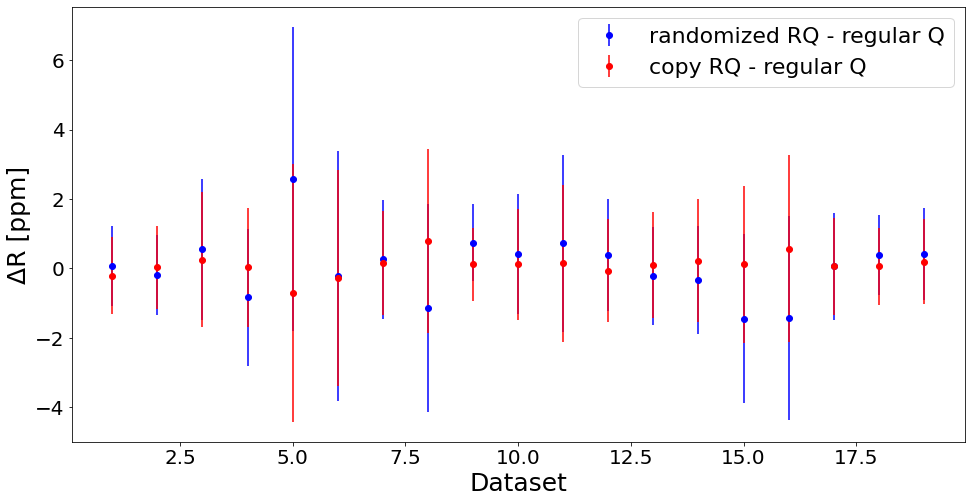

In [20]:
plt.figure(figsize=(16,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(rand_dataset, R_rand_diff, yerr=dR_rand_diff, fmt="o",color="blue",label="randomized RQ - regular Q")
plt.errorbar(rand_dataset, R_copy_diff, yerr=dR_copy_diff, fmt="o",color="red",label="copy RQ - regular Q")
plt.xlabel('Dataset',fontsize=25)
plt.ylabel('ΔR [ppm]',fontsize=25)
#plt.ylim([-48,-35])
#plt.xlim([100000,150000])
plt.legend(loc=1, prop={'size': 22})
#plt.grid()
plt.show()

In [21]:
R_rand_diff

array([ 0.067467, -0.194915,  0.550554, -0.839451,  2.584775, -0.220501,
        0.254686, -1.147231,  0.735167,  0.414622,  0.715999,  0.383829,
       -0.216497, -0.336298, -1.449451, -1.430821,  0.062257,  0.394755,
        0.413103])

In [ ]:
0.067467, -0.194915,  0.550554, -0.839451,  2.584775, -0.220501, 0.254686, -1.147231,  0.735167,  0.414622,  0.715999,  0.383829,-0.216497, -0.336298, -1.449451, -1.430821,  0.062257,  0.394755, 0.413103

In [22]:
R_copy_diff

array([-0.21046135,  0.02702787,  0.2489854 ,  0.03647445, -0.71566929,
       -0.27227194,  0.15275372,  0.78481638,  0.11370407,  0.11146019,
        0.14239926, -0.06365805,  0.10038124,  0.22356834,  0.11497809,
        0.56669309,  0.05385638,  0.05883322,  0.18796439])

In [ ]:
-0.21046135,  0.02702787,  0.2489854 ,  0.03647445, -0.71566929, -0.27227194,  0.15275372,  0.78481638,  0.11370407,  0.11146019,0.14239926, -0.06365805,  0.10038124,  0.22356834,  0.11497809,0.56669309,  0.05385638,  0.05883322,  0.18796439

In [23]:
R_copy_rand_diff

array([-0.27792835,  0.22194287, -0.3015686 ,  0.87592545, -3.30044429,
       -0.05177094, -0.10193228,  1.93204738, -0.62146293, -0.30316181,
       -0.57359974, -0.44748705,  0.31687824,  0.55986634,  1.56442909,
        1.99751409, -0.00840062, -0.33592178, -0.22513861])

In [ ]:
-0.27792835,  0.22194287, -0.3015686 ,  0.87592545, -3.30044429,-0.05177094, -0.10193228,  1.93204738, -0.62146293, -0.30316181,-0.57359974, -0.44748705,  0.31687824,  0.55986634,  1.56442909, 1.99751409, -0.00840062, -0.33592178, -0.22513861